## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [41]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [42]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [73]:
a=-1
b=2

Y=a*X+b
Y

array([ -2.48979592,  -3.71428571, -14.32653061,   1.59183673,
       -15.14285714,  -0.04081633,   0.7755102 ,  -6.16326531,
       -17.59183673,  -5.75510204, -18.        ,  -8.20408163,
        -9.42857143, -11.46938776, -13.51020408, -12.69387755,
       -13.91836735,  -7.3877551 ,  -3.30612245,  -2.89795918,
        -4.93877551, -12.28571429,  -9.83673469,  -8.6122449 ,
        -1.67346939, -17.18367347, -13.10204082,   1.18367347,
        -6.57142857,  -9.02040816, -16.7755102 , -11.87755102,
        -4.12244898,  -0.44897959,  -0.85714286, -15.55102041,
       -15.95918367,  -5.34693878,  -7.79591837,  -4.53061224,
       -11.06122449,  -6.97959184, -10.24489796,   0.36734694,
        -2.08163265,  -1.26530612, -10.65306122, -16.36734694,
       -14.73469388,   2.        ])

### Plot X vs. y

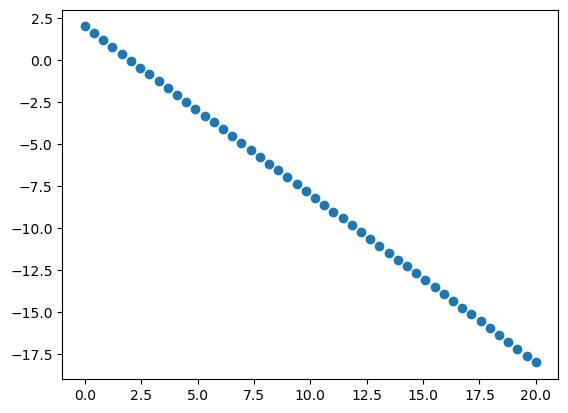

In [4]:
plt.scatter(X,y)

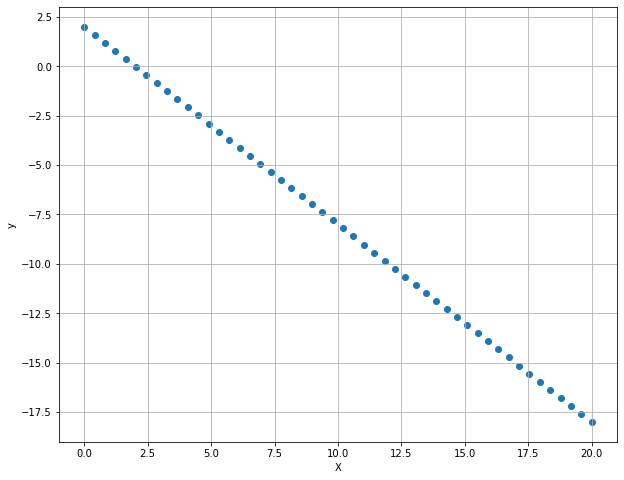

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [74]:
perm=np.random.permutation(len(X))
X=X[perm]
Y=Y[perm]

In [76]:
print(X)

[ 9.79591837 15.91836735  8.57142857 19.18367347  3.67346939  8.16326531
 11.02040816 12.24489796  5.30612245  7.75510204 12.65306122  1.2244898
  4.89795918  1.63265306 17.95918367  4.08163265  8.97959184  5.71428571
 16.32653061 18.36734694 15.10204082 19.59183673  0.81632653  3.26530612
  2.44897959  6.93877551 10.6122449   0.         11.42857143 14.28571429
 13.87755102 15.51020408 17.55102041  7.34693878  0.40816327 13.46938776
  2.04081633 17.14285714 16.73469388  9.3877551  14.69387755 13.06122449
 18.7755102  11.83673469  6.53061224  6.12244898 20.          4.48979592
  2.85714286 10.20408163]


In [77]:
print(Y)

[ -7.79591837 -13.91836735  -6.57142857 -17.18367347  -1.67346939
  -6.16326531  -9.02040816 -10.24489796  -3.30612245  -5.75510204
 -10.65306122   0.7755102   -2.89795918   0.36734694 -15.95918367
  -2.08163265  -6.97959184  -3.71428571 -14.32653061 -16.36734694
 -13.10204082 -17.59183673   1.18367347  -1.26530612  -0.44897959
  -4.93877551  -8.6122449    2.          -9.42857143 -12.28571429
 -11.87755102 -13.51020408 -15.55102041  -5.34693878   1.59183673
 -11.46938776  -0.04081633 -15.14285714 -14.73469388  -7.3877551
 -12.69387755 -11.06122449 -16.7755102   -9.83673469  -4.53061224
  -4.12244898 -18.          -2.48979592  -0.85714286  -8.20408163]


In [78]:
def batch_gradient_descent_function(X,Y,lr,_max_number_of_iteration):
    theta_0_new=0
    theta_1_new=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    h_x_array=[]
    for i in range(_max_number_of_iteration):
        print(f'****************** Iteration {i} ******************** \n\n')
        theta_0_array.append(theta_0_new)
        theta_1_array.append(theta_1_new)
        h_x=theta_0_new+theta_1_new*X
        h_x_array.append(h_x)
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        loss_array.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        if np.linalg.norm(gradient_vector)<0.3:
            print("break as gradient vector is almost 0")
            break
        if len(loss_array)>1 and np.abs((loss_array[-2]-loss_array[-1]))<.0001:
            print("break as loss almost 0")
            break
        theta_0_new=theta_0_new-lr*d_theta_0
        theta_1_new=theta_1_new-lr*d_theta_1
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
    return theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [79]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=batch_gradient_descent_function(X,Y,0.0005,300)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.004
theta_0_new -0.05734693877551021
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.99783257  5.3063

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [81]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.9707406024215084


r2_score: 0.9686158031920962


##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

Text(0, 0.5, 'Y')

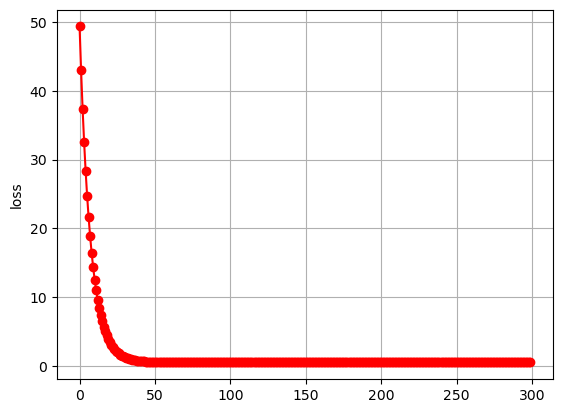

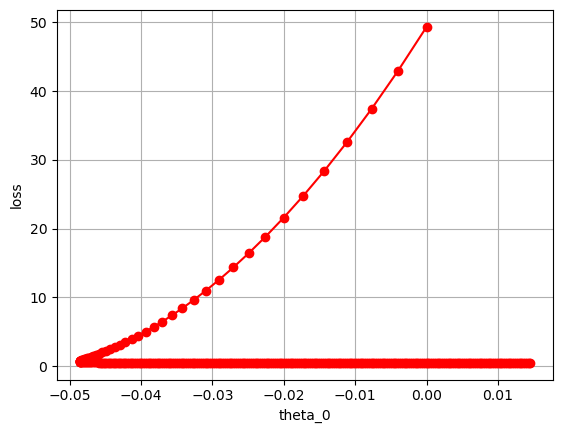

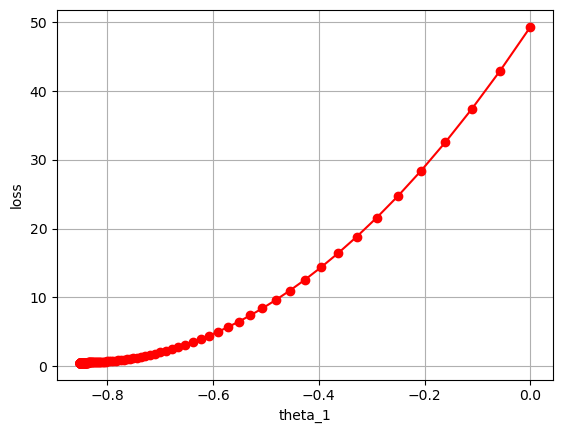

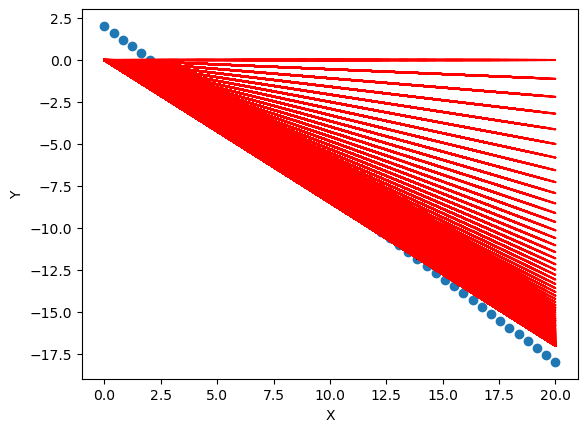

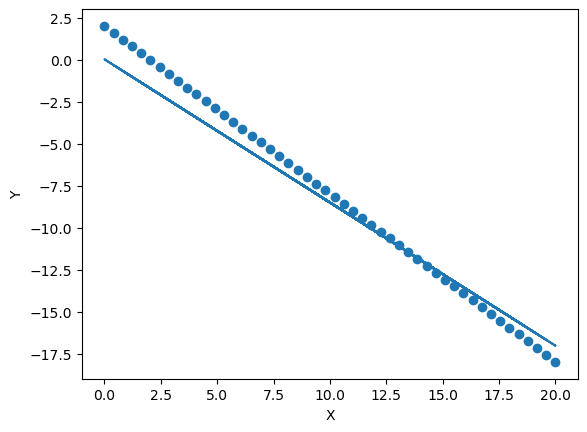

In [86]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

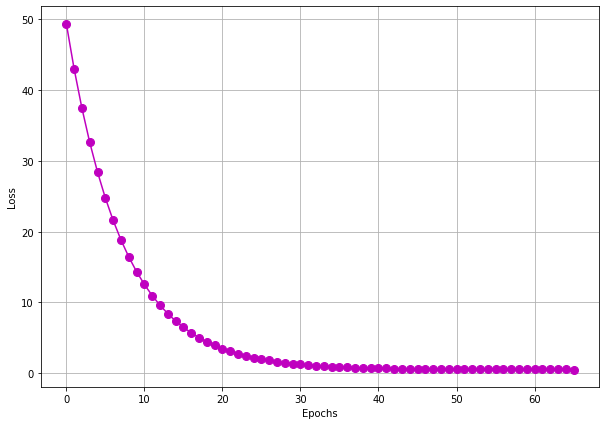

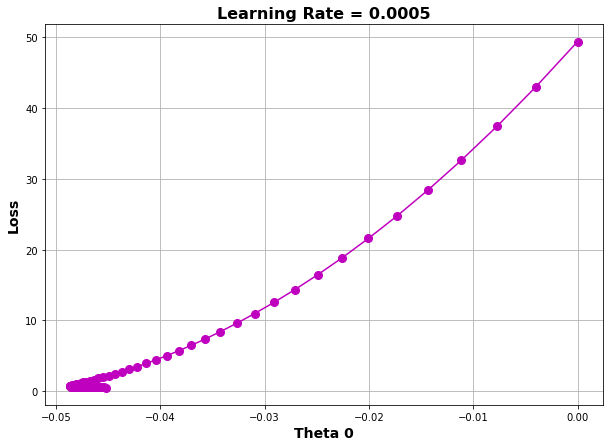

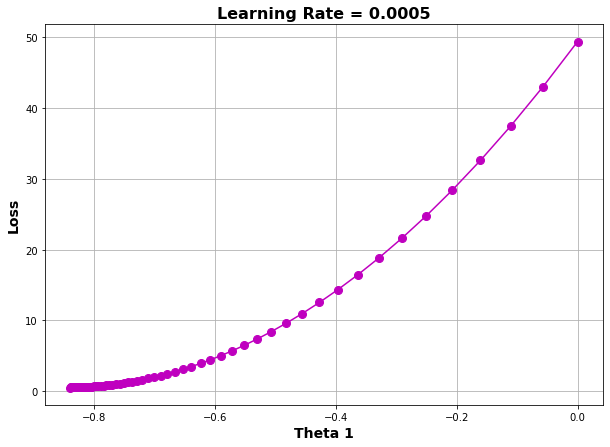

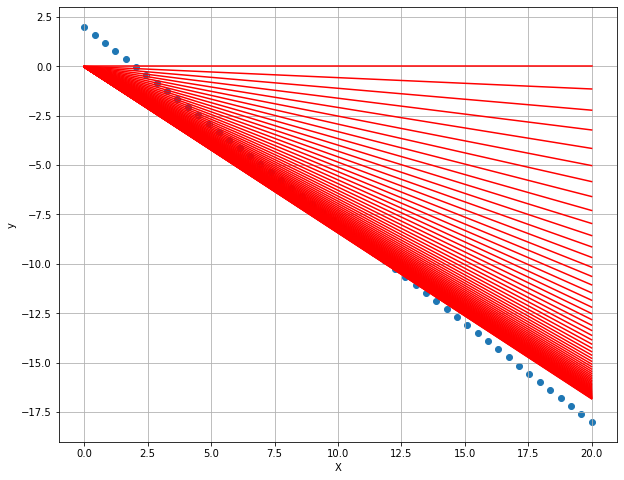

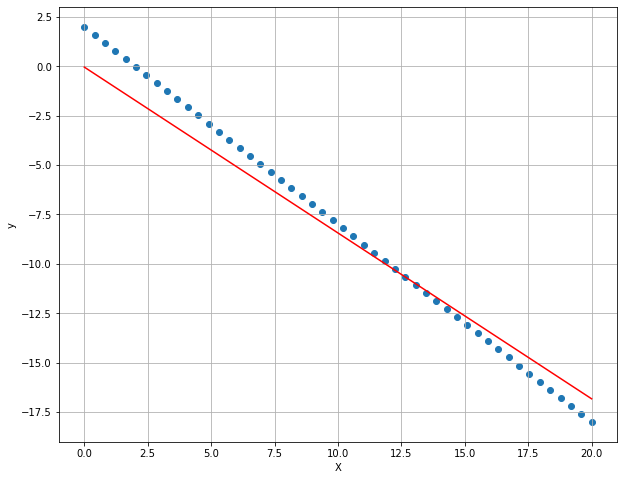

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [180]:
def momentum_G_D_function(X,Y,lr,_max_number_of_iteration,gamma):
    theta_0_new=0
    theta_1_new=0
    v0=0
    v1=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    for i in range(_max_number_of_iteration):
        print(f'****************** Iteration {i} ******************** \n\n')
        theta_0_array.append(theta_0_new)
        theta_1_array.append(theta_1_new)
        h_x=theta_0_new+theta_1_new*X
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        loss_array.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        
        v0=gamma*v0+lr*d_theta_0
        v1=gamma*v1+lr*d_theta_1
        print("d_theta_0",theta_0_new)
        print("d_theta_1",theta_1_new)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        if np.linalg.norm(gradient_vector)<0.7:
            print("break as gradient vector is almost 0")
            break
        if len(loss_array)>1 and np.abs((loss_array[-2]-loss_array[-1]))<.0001:
            print("break as loss almost 0")
            break
        theta_0_new=theta_0_new-v0
        theta_1_new=theta_1_new-v1
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
    return theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new
    

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [181]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=momentum_G_D_function(X,Y,0.0005,300,0.5)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.004
theta_0_new -0.05734693877551021
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.99783257  5.3063

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [163]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.96886335469046


r2_score: 0.9687892837396442


Text(0, 0.5, 'Y')

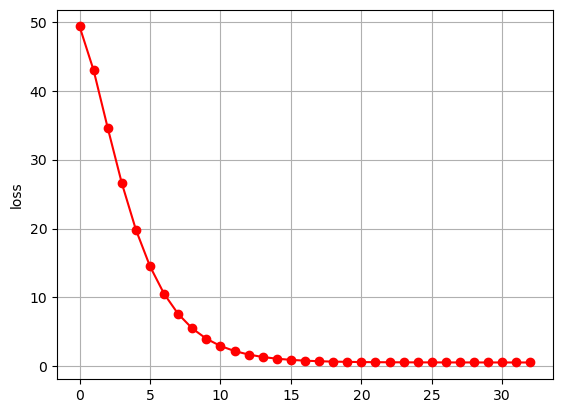

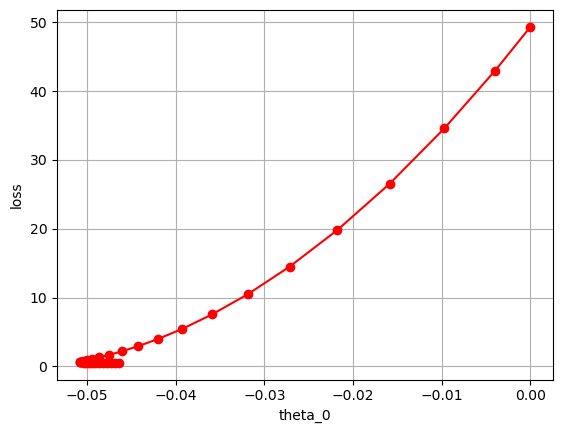

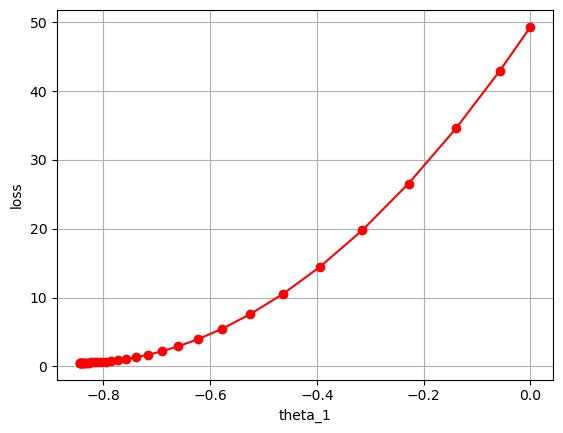

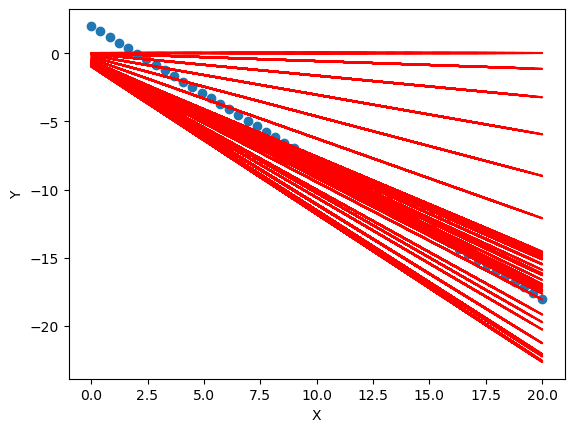

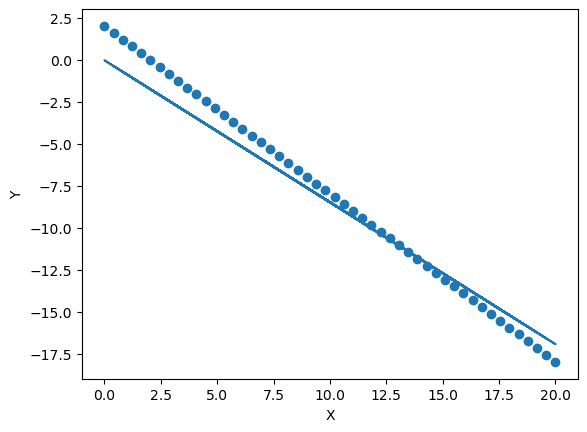

In [164]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

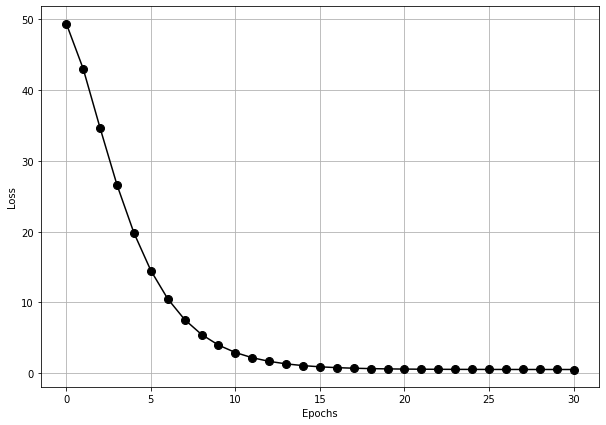

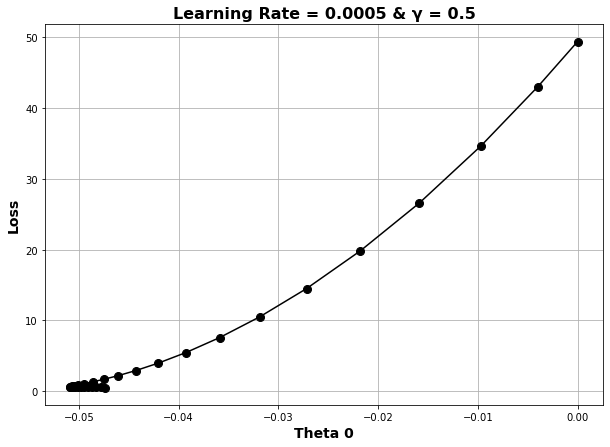

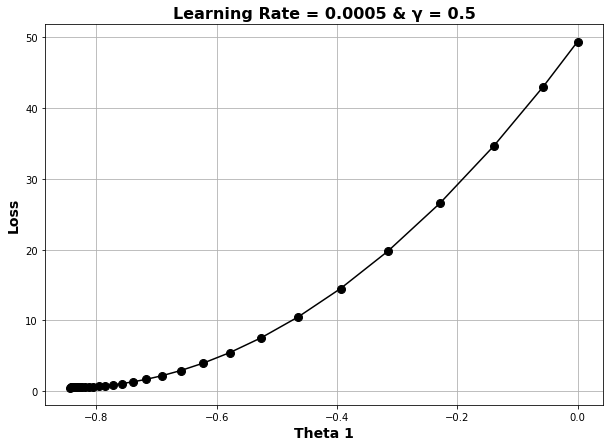

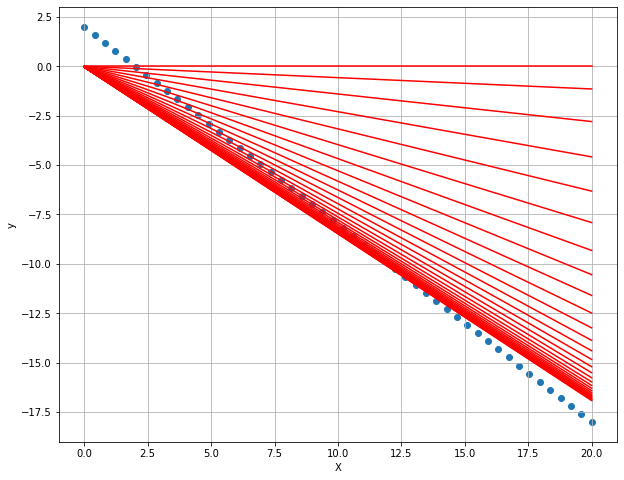

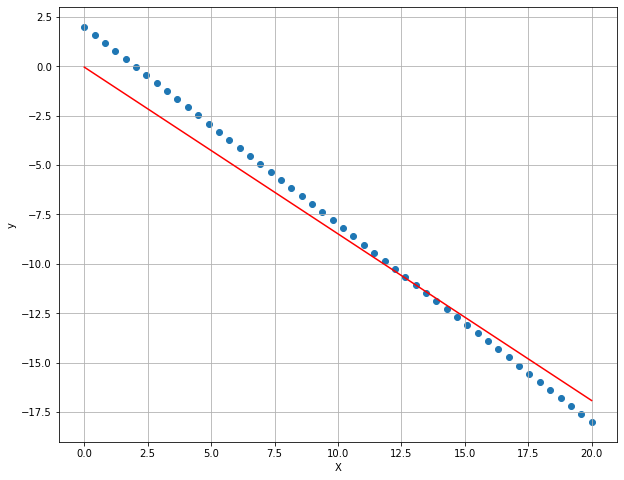

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [175]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=momentum_G_D_function(X,Y,0.0005,300,0.9)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.004
theta_0_new -0.05734693877551021
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.99783257  5.3063

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [176]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.97096361345758


r2_score 0.973589591111118


Text(0, 0.5, 'Y')

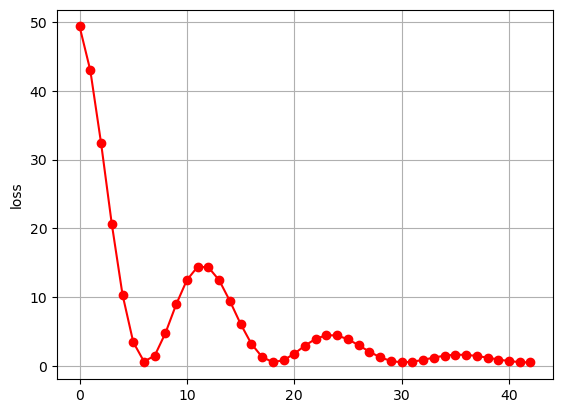

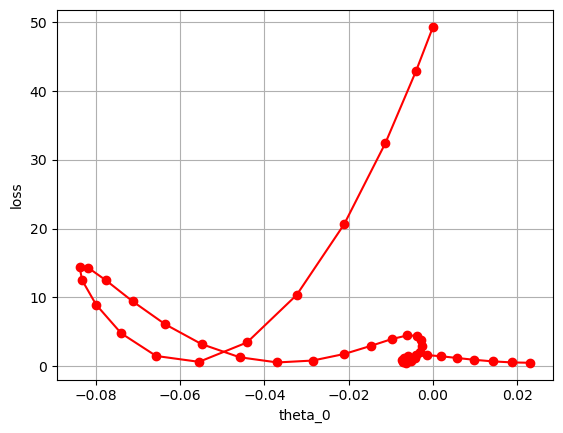

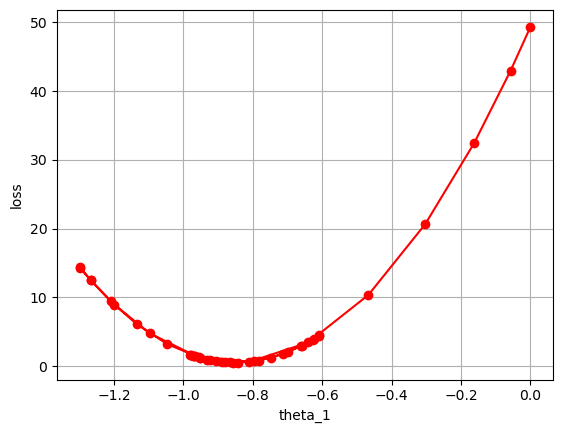

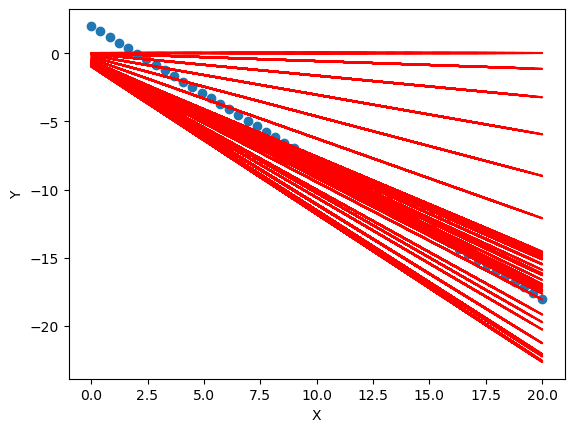

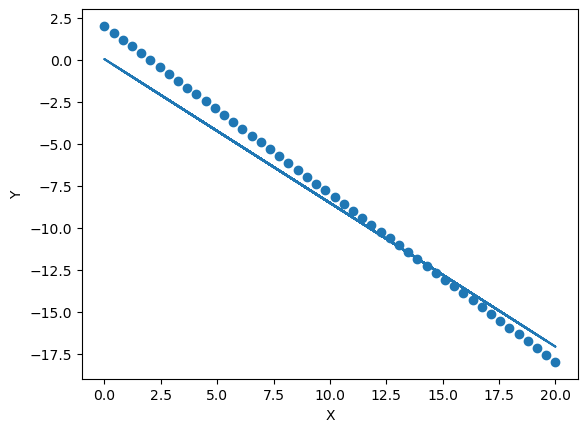

In [177]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

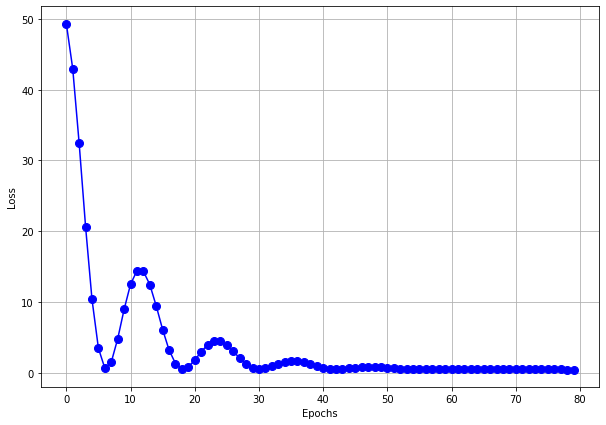

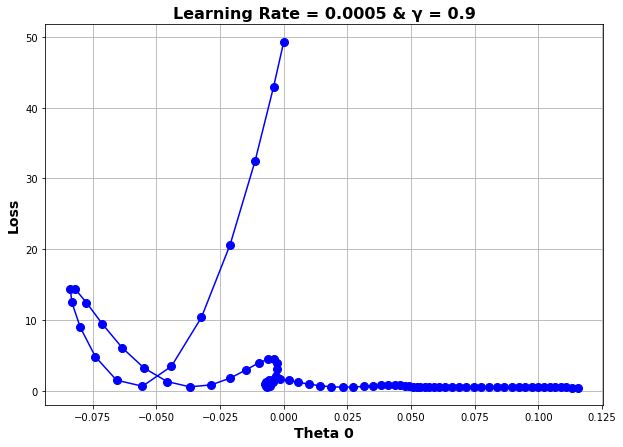

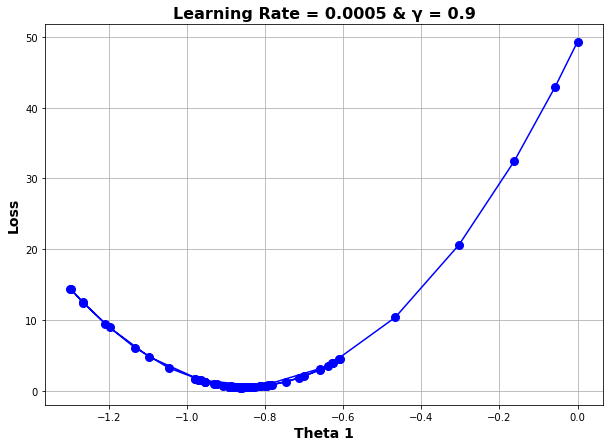

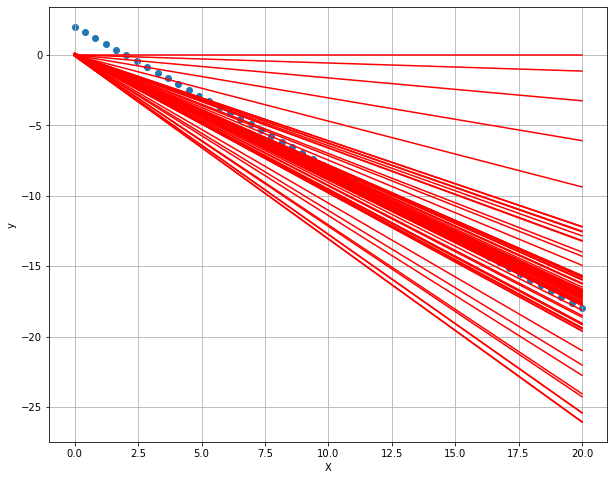

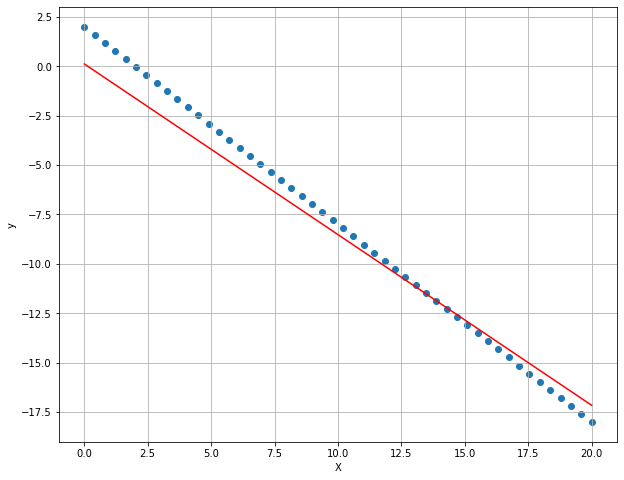

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [100]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=momentum_G_D_function(X,Y,0.0005,300,0.89)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.004
theta_0_new -0.05734693877551021
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.99783257  5.3063

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

v_0 : 0.004
v_1 : 0.05734693877551021

theta_0

In [101]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.9716105059010212


Text(0, 0.5, 'Y')

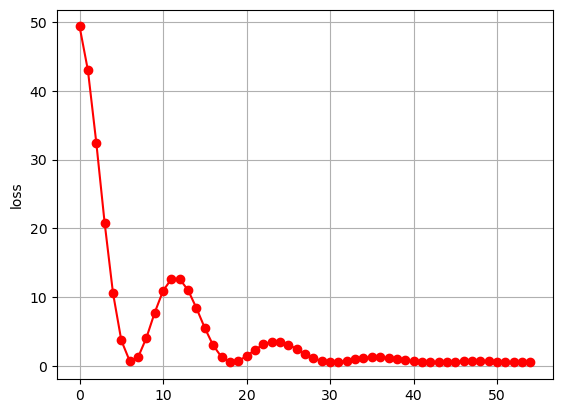

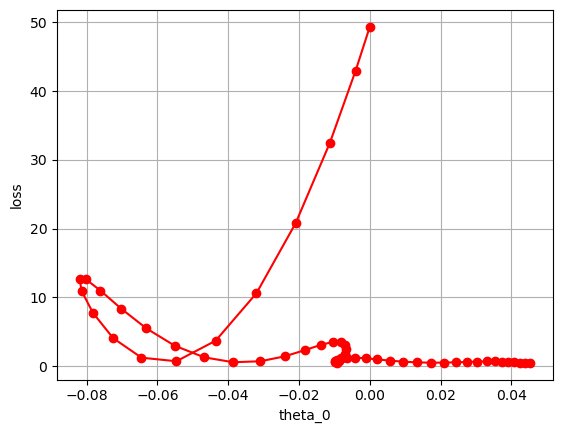

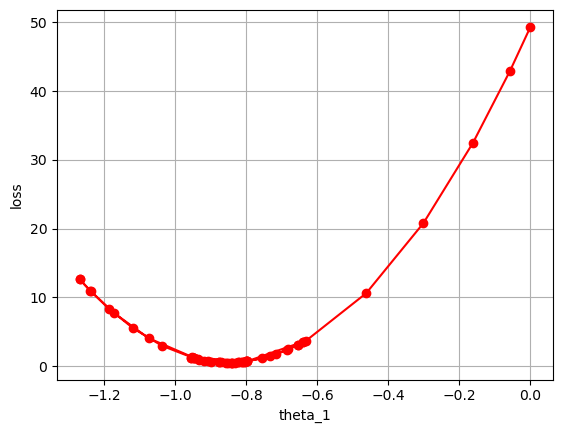

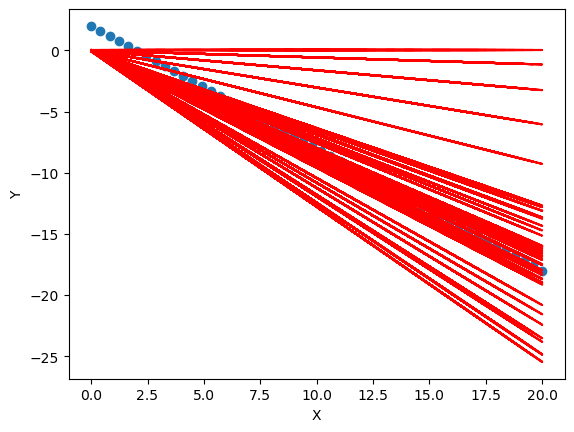

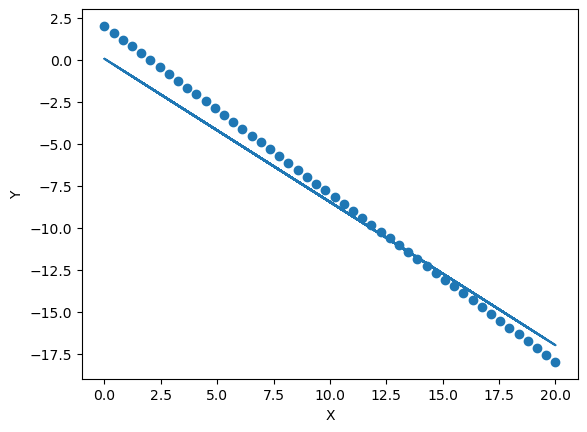

In [102]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

r2 score =  0.972435565060376


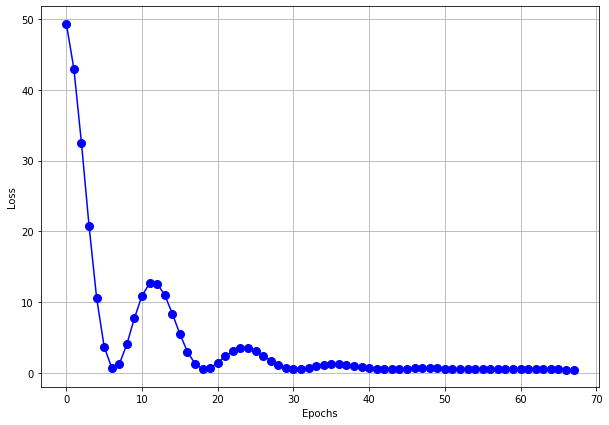

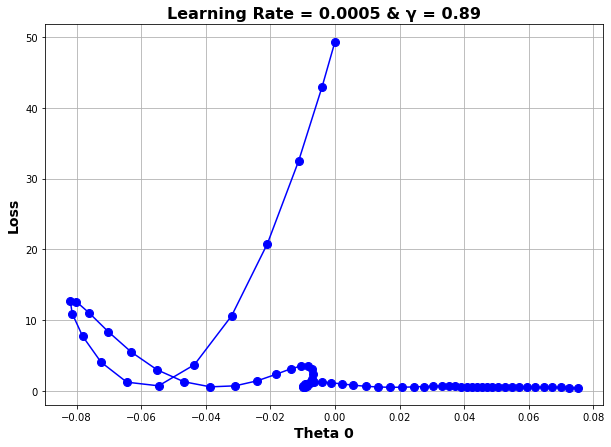

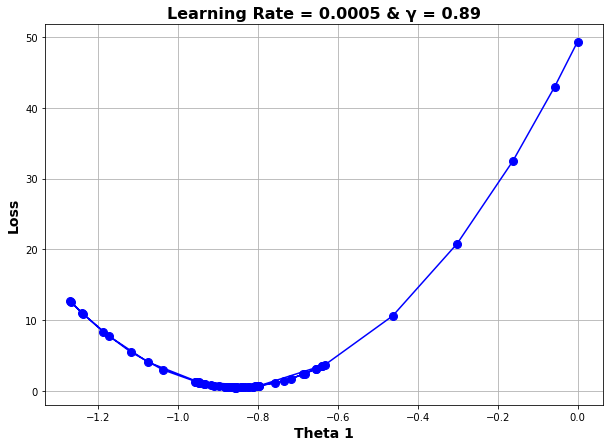

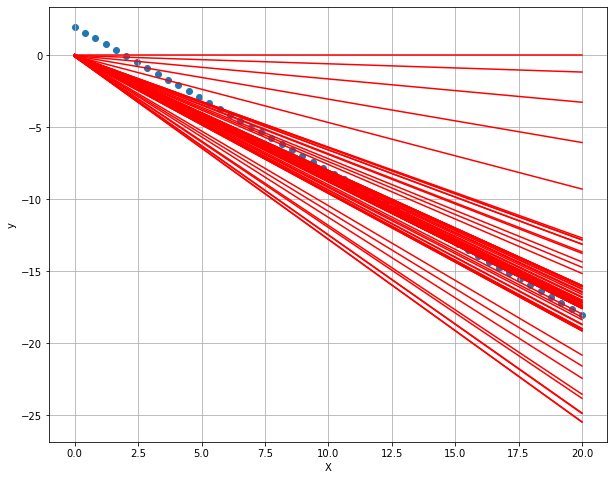

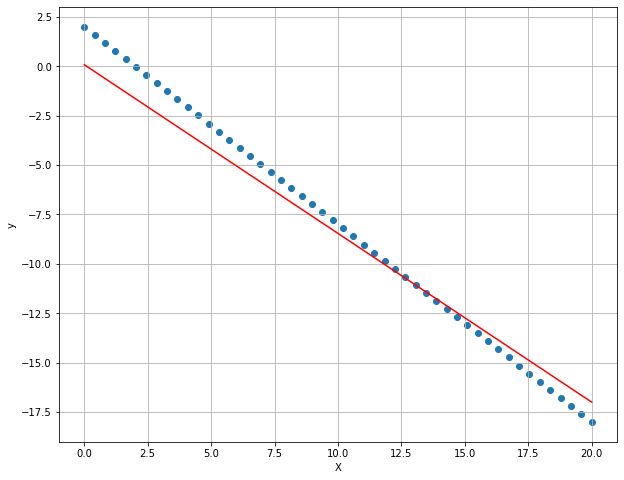

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [182]:
def NAG(X,Y,lr,_max_number_of_iteration,gamma):
    number_of_iteration=1000
    theta_0=0
    theta_1=0
    v0=0
    v1=0
    loss_array=[]
    theta_0_array=[]
    theta_1_array=[]
    for i in range(_max_number_of_iteration):
        print(f'****************** Iteration {i} ******************** \n\n')
        theta_0_array.append(theta_0)
        theta_1_array.append(theta_1)
        #update with v(t-1)
       
        h_x=theta_0+theta_1*X
        error_vector=h_x-Y
        j=np.linalg.norm(error_vector)**2/(2*error_vector.shape[0])
        loss_array.append(j)
        print("error_vector",error_vector)
        print("j",j)
        d_theta_0=error_vector.sum()/error_vector.shape[0]
        d_theta_1=(error_vector*X).sum()/error_vector.shape[0]
        print("d_theta_0",theta_0)
        print("d_theta_1",theta_1)
        gradient_vector=np.array([d_theta_0,d_theta_1])
        print("Gradient Vector Norm:",np.linalg.norm(gradient_vector))
        if np.linalg.norm(gradient_vector)<0.7:
            print("break as gradient vector is almost 0")
            break
        if len(loss_array)>1 and np.abs((loss_array[-2]-loss_array[-1]))<.01:
            print("break as loss almost 0")
            break 
            
        theta_0_temp=theta_0-gamma*v0
        theta_1_temp=theta_1-gamma*v1
        
        h_x_temp=theta_0_temp+theta_1_temp*X
        error_vector_temp=h_x_temp-Y
        j=np.linalg.norm(error_vector_temp)**2/(2*error_vector_temp.shape[0])

        d_theta_0_temp=error_vector_temp.sum()/error_vector_temp.shape[0]
        d_theta_1_temp=(error_vector_temp*X).sum()/error_vector_temp.shape[0]
        
        theta_0=theta_0_temp-lr*d_theta_0_temp
        theta_1=theta_1_temp-lr*d_theta_1_temp
        print("theta_0_new",theta_0_new)
        print("theta_0_new",theta_1_new)
        v0=gamma*v0+lr*d_theta_0_temp
        v1=gamma*v1+lr*d_theta_1_temp
        
    return theta_0_array,theta_1_array,loss_array,h_x_array,theta_0,theta_1
    

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [183]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=NAG(X,Y,0.0005,300,0.9)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.04641531469646079
theta_0_new -0.844653792888014
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.9978

In [184]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.969296956317891


r2_score 0.971103130756324


Text(0, 0.5, 'Y')

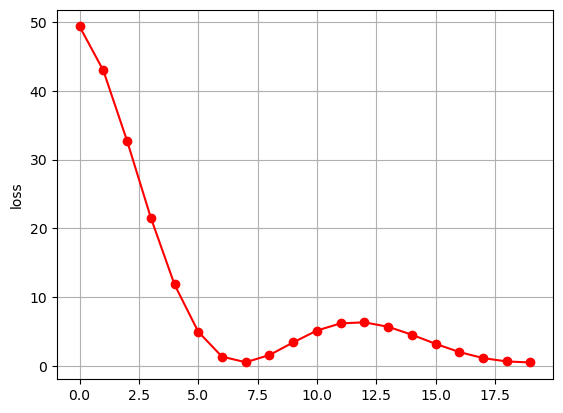

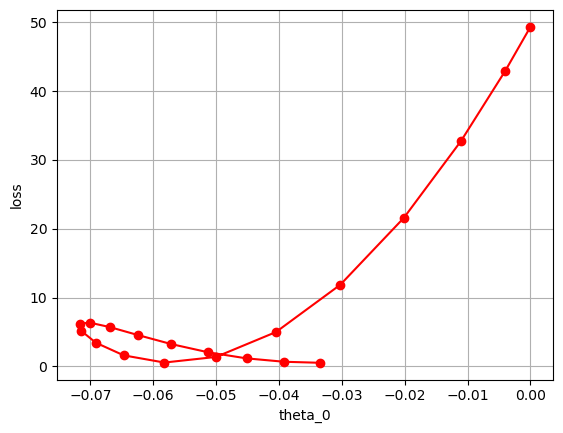

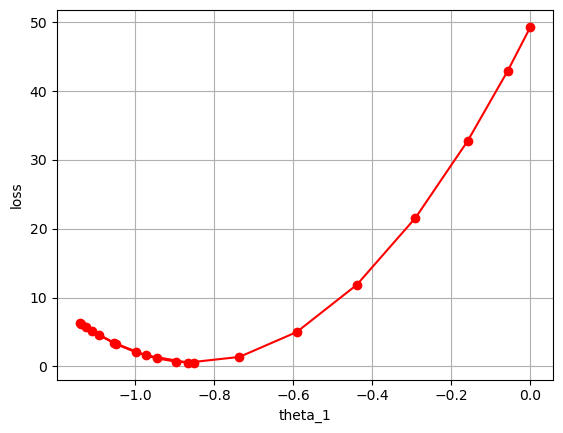

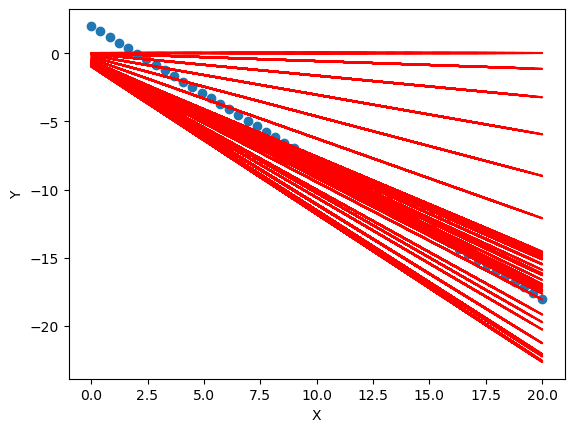

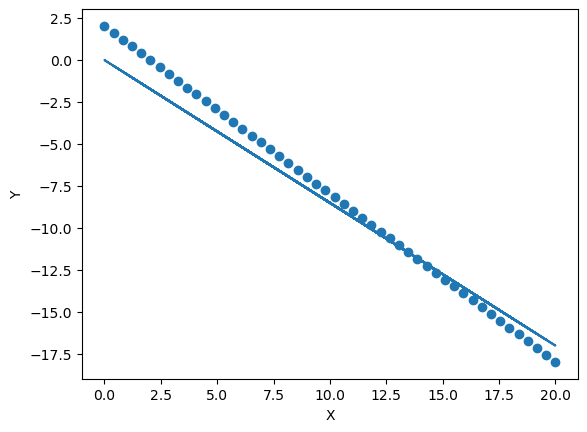

In [185]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

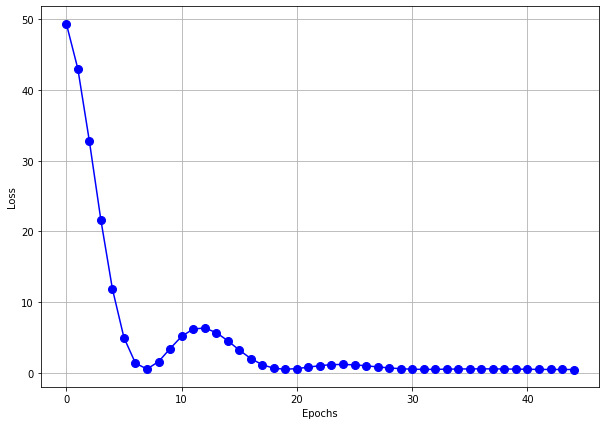

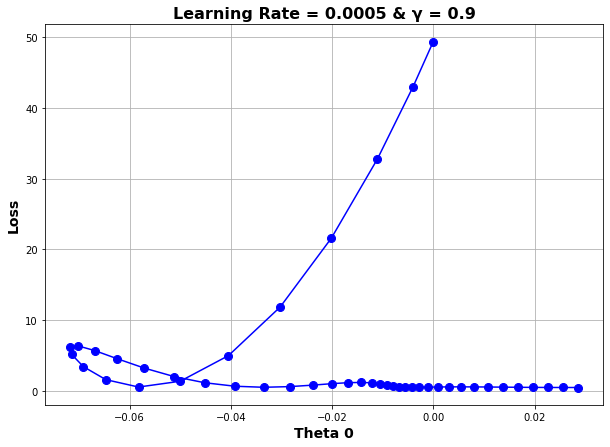

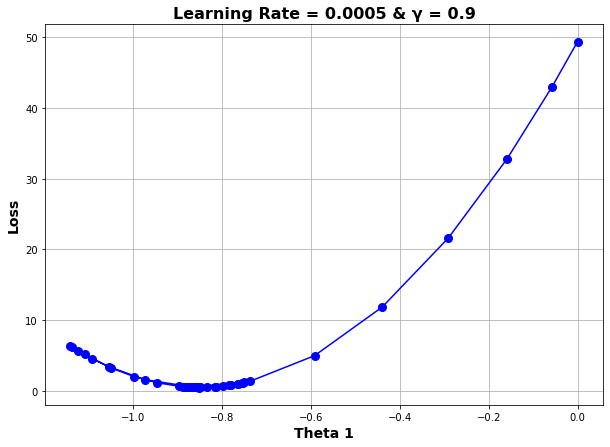

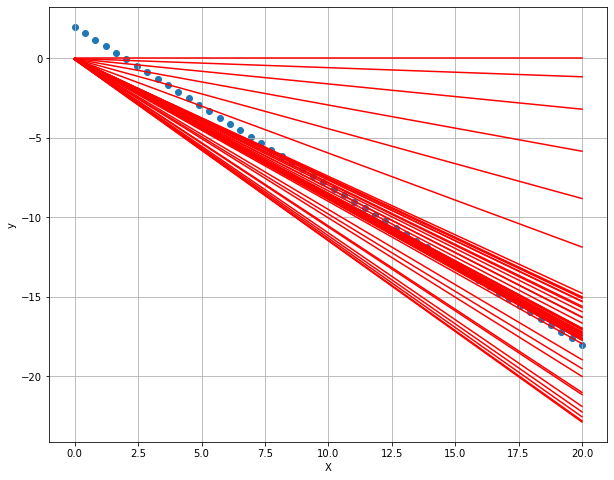

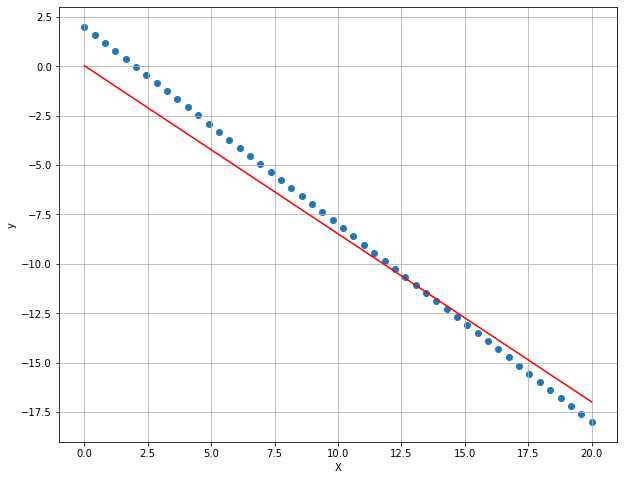

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [186]:
 theta_0_array,theta_1_array,loss_array,h_x_array,theta_0_new,theta_1_new=NAG(X,Y,0.0005,300,0.89)

****************** Iteration 0 ******************** 


error_vector [ 7.79591837 13.91836735  6.57142857 17.18367347  1.67346939  6.16326531
  9.02040816 10.24489796  3.30612245  5.75510204 10.65306122 -0.7755102
  2.89795918 -0.36734694 15.95918367  2.08163265  6.97959184  3.71428571
 14.32653061 16.36734694 13.10204082 17.59183673 -1.18367347  1.26530612
  0.44897959  4.93877551  8.6122449  -2.          9.42857143 12.28571429
 11.87755102 13.51020408 15.55102041  5.34693878 -1.59183673 11.46938776
  0.04081633 15.14285714 14.73469388  7.3877551  12.69387755 11.06122449
 16.7755102   9.83673469  4.53061224  4.12244898 18.          2.48979592
  0.85714286  8.20408163]
j 49.346938775510196
d_theta_0 0
d_theta_1 0
Gradient Vector Norm: 114.97254258164628
theta_0_new -0.033530882126762605
theta_0_new -0.8497364764932346
****************** Iteration 1 ******************** 


error_vector [ 7.23015244 13.00149771  6.07588338 16.07954852  1.45880716  5.69112703
  8.38442149  9.53869055  2.99

r2_score:  0.9438518381940362


****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

In [187]:
h_x=theta_0_new+theta_1_new*X
print("r2_score: ",r2_score(Y,h_x))

r2_score:  0.9699718983158406


r2 score =  0.9699718983158406


Text(0, 0.5, 'Y')

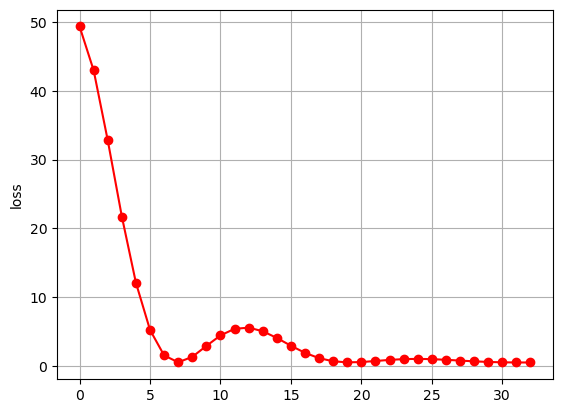

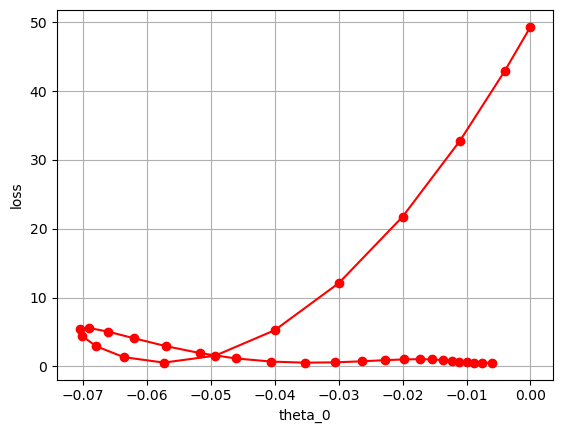

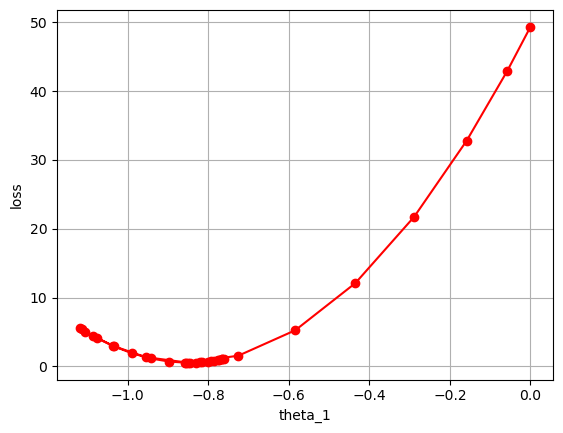

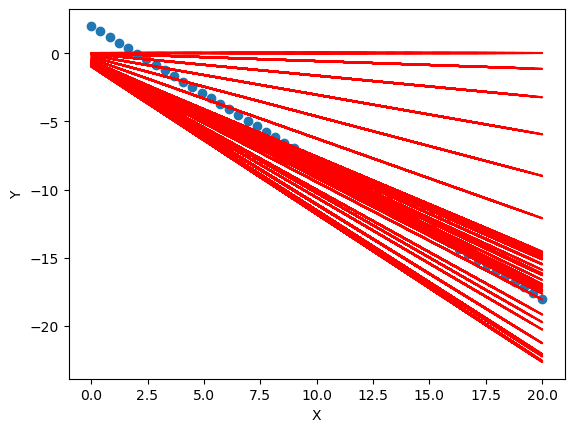

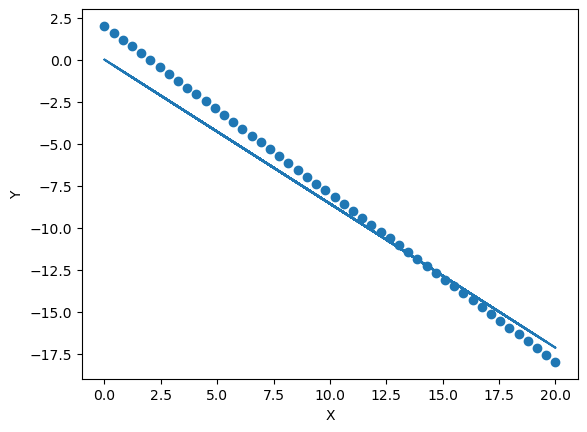

In [188]:
plt.figure(1) 
plt.plot(loss_array, marker='o', linestyle='-', color='r')
plt.grid(True)
plt.ylabel("loss")

plt.figure(2) 
plt.plot(theta_0_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_0")
plt.ylabel("loss")
plt.grid(True)

plt.figure(3) 
plt.plot(theta_1_array,loss_array, marker='o', linestyle='-', color='r')
plt.xlabel("theta_1")
plt.ylabel("loss")
plt.grid(True)

plt.figure(4) 
plt.scatter(X,Y)
for array in h_x_array[0:300]:
    plt.plot(X,array,color="r")
plt.xlabel("X")
plt.ylabel("Y")

    
plt.figure(5) 
plt.scatter(X,Y)
plt.plot(X,h_x)
plt.xlabel("X")
plt.ylabel("Y")

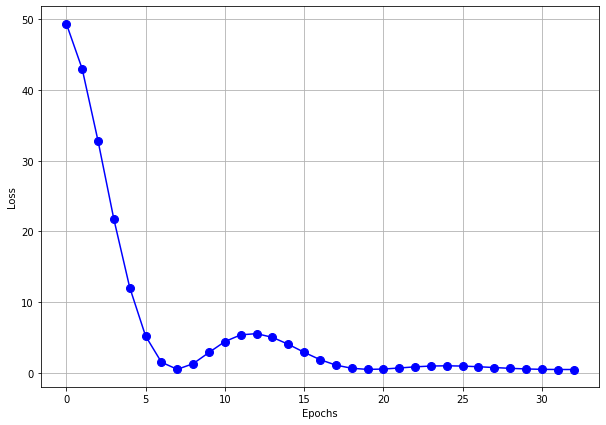

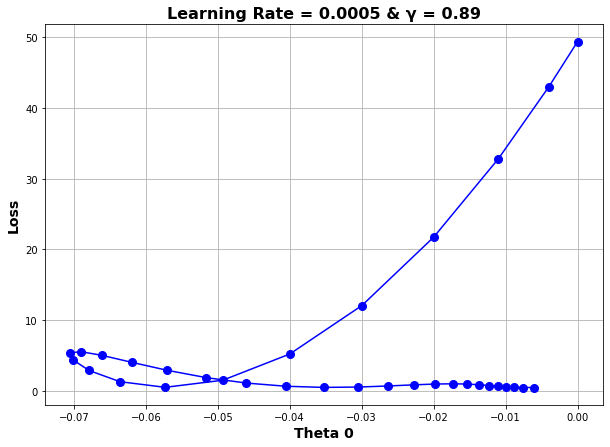

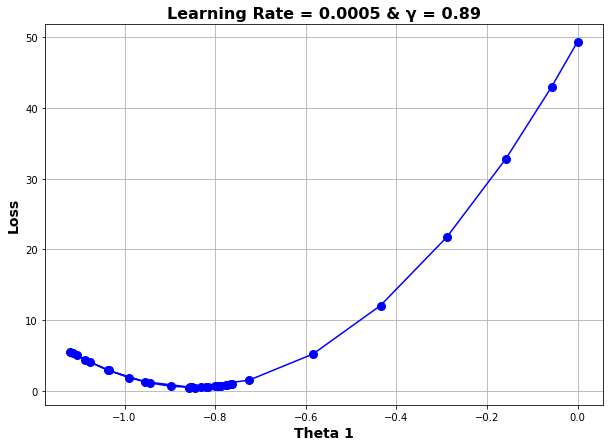

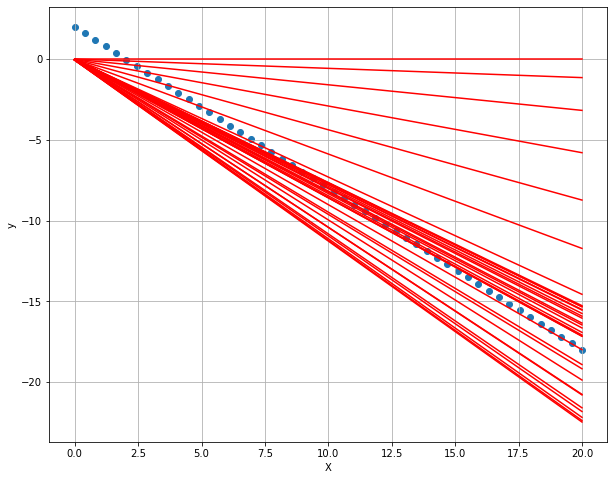

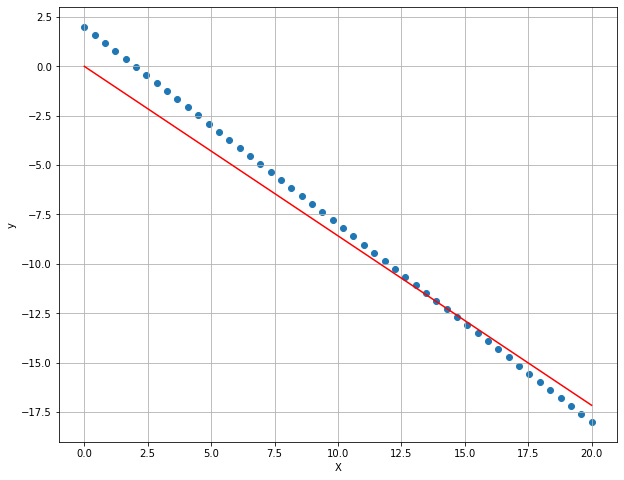